## **Kütüphaneleri Yükle**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Veriyi Yükle**

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MallCustomers/Mall_Customers.csv')

## **Veri Ön İşleme**

In [98]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [115]:
df['Gender'] = df['Gender'].replace({
    'Male' : 0 ,
    'Female' : 1
}).astype(int)

In [117]:
X=df[['Gender' ,  'Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]

## **Modelleme**

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [104]:
model = KMeans(n_clusters = 4 , random_state=42)

In [105]:
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [106]:
predictions = model.predict(X)
X['Cluster'] = predictions
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0


In [107]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,3
197,0,32,126,74,1
198,0,32,137,18,3


Silhouette_score , küme yapısının kalitesini ölçer , skor -1 ile 1 arasında değer alır. 1'e yakın değerler, veri noktalarının kendi kümelerine iyi uyum sağladığını ve komşu kümelerden iyi ayrıldığını gösterir. Bu, iyi bir kümeleme sonucuna işaret eder. 0 değeri, veri noktalarının kümeleri arasında belirsizlik olduğunu gösterir. -1'e yakın değerler, veri noktalarının yanlış kümelere atandığını gösterir.

silhouette_score(X, model.labels_)

## **Veri Görselleştirme**

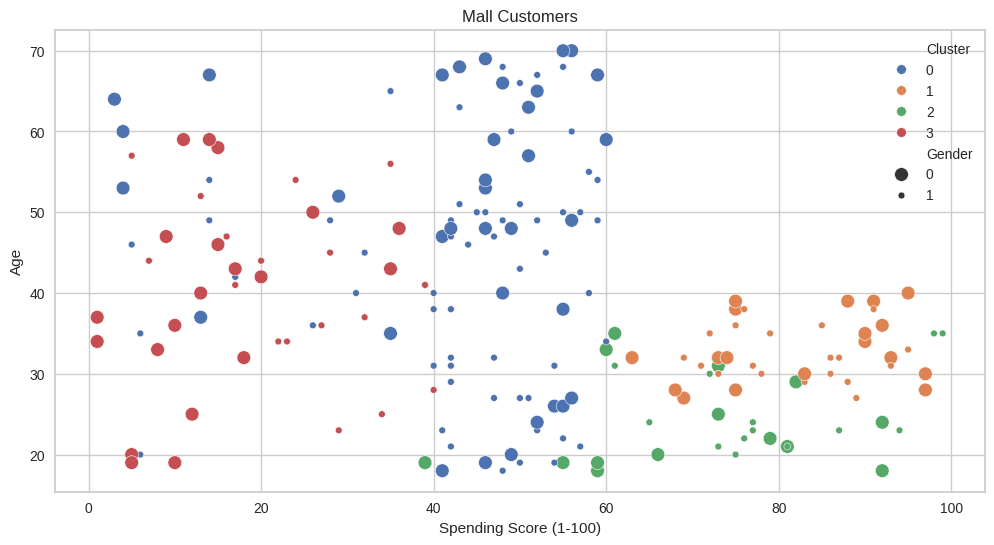

In [108]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = X , x='Spending Score (1-100)' , y='Age' , hue='Cluster' , size = 'Gender' , palette='deep')
plt.title('Mall Customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()


In [109]:
import plotly.graph_objects as go

##plotly grafik objesini oluşturalım
fig = go.Figure()

## fig size

fig.update_layout(width=800 , height=500)

## 3d scatterplot ekleyelim
fig.add_trace(go.Scatter3d(
    x=X['Spending Score (1-100)'],
    y=X['Age'],
    z=X['Annual Income (k$)'],
    mode = 'markers' ,
    marker= dict(
        size = 5 ,  # noktaların boyutu
        color = X['Cluster'] , # noktaların rengi(Cluster sütununa göre)
        colorscale = 'Viridis' , # renk skalası
        opacity = 0.8 # noktaların opaklığı

    )
))

## grafiği göster
fig.show()

In [110]:
pip install yellowbrick

In [111]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MallCustomers/Mall_Customers.csv')

In [112]:
X = df[['Gender' ,'Age' , 'Spending Score (1-100)' , 'Annual Income (k$)']]

In [113]:
X.head()

,Gender,Age,Spending Score (1-100),Annual Income (k$)
0,Male,19,39,15
1,Male,21,81,15
2,Female,20,6,16
3,Female,23,77,16
4,Female,31,40,17


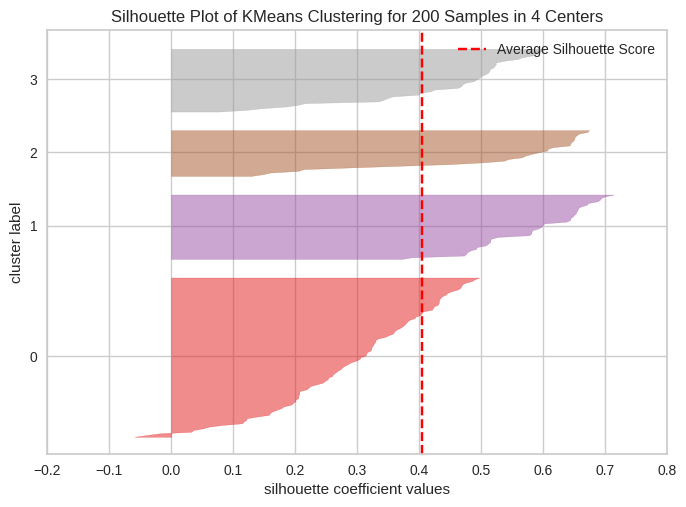

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [118]:
model = KMeans(n_clusters=4 , random_state=42)
visualizer = SilhouetteVisualizer(model , color='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [119]:
wcss = [] ## within-sum-of-squares değerlerini saklamak için bir liste
ss = [] # her bir küme sayısı için hesaplanan Silhouette skorlarını saklamak için bir liste
for i in range(2,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  ss.append(silhouette_score(X , kmeans.predict(X)))


## **Küme Sayısını Belirleme-Dirsek(Elbow)Yöntemi**

<Axes: >

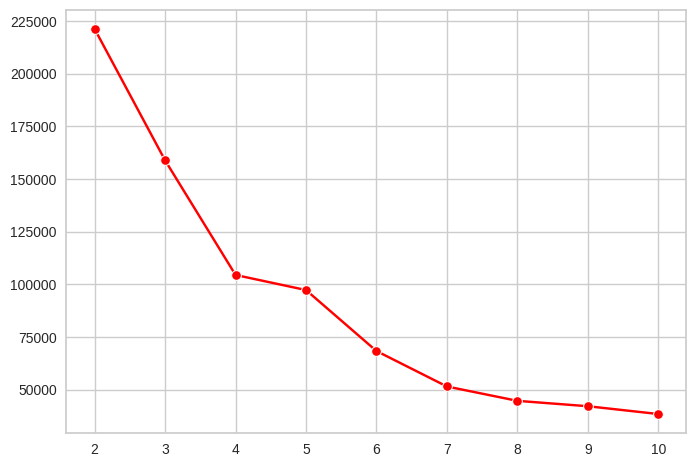

In [120]:
sns.lineplot(x=range(2,11) , y = wcss , marker = 'o' , color='red')

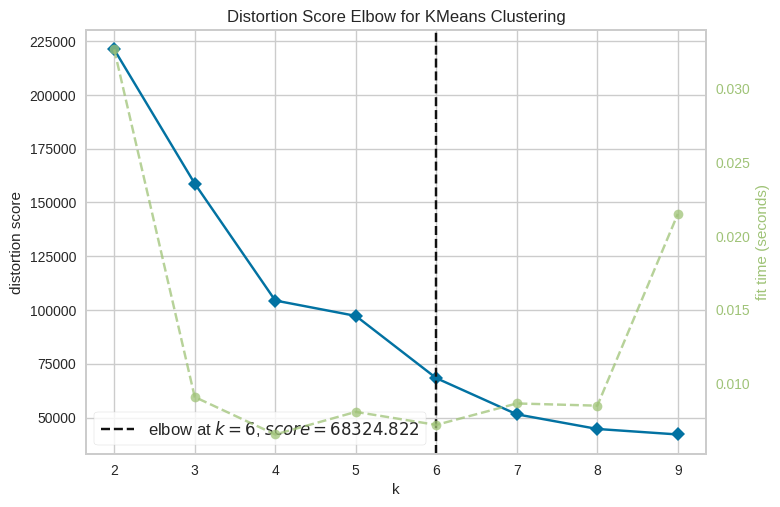

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer # KElbowVisualizer, Yellowbrick kütüphanesinden Elbow yöntemi için bir görselleştirici sınıfıdır.
# Bu, farklı küme sayıları için KMeans algoritmasının performansını değerlendirmeye yardımcı olur.

model = KMeans(random_state = 42)

visualizer = KElbowVisualizer(model , k=(2,10) , metric='distortion' , timings='False')
#k=(2, 10), 2 ile 10 arasındaki küme sayıları için değerlendirme yapılacağını belirtir.
#dirsek yönteminde kullanılacak metriği belirten "Distortion", WCS S (within-cluster sum of squares) değerini
#ifade eder; Bu, kümelerin kalitesini ölçerken kullanılan bir metriktir.
#timings='False', zamanlama bilgilerini gösterip göstermeyeceğini belirler. Burada zamanlama bilgisi gösterilmeyecek.

visualizer.fit(X)
visualizer.show()
